## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    #建立你的神經網路
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
"""
Compile 模型
"""
from keras import optimizers

optimizer = optimizers.SGD(lr=0.01, decay=0.0, momentum=0.0, nesterov=False)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [9]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=250, 
          batch_size=128, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/250
50000/50000 [==============================] - 107s 2ms/step - loss: 0.8247 - acc: 0.7527 - val_loss: 2.3524 - val_acc: 0.4798
Epoch 2/250
50000/50000 [==============================] - 97s 2ms/step - loss: 0.5123 - acc: 0.8232 - val_loss: 3.2090 - val_acc: 0.4268
Epoch 3/250
50000/50000 [==============================] - 89s 2ms/step - loss: 0.4409 - acc: 0.8499 - val_loss: 2.2367 - val_acc: 0.5127
Epoch 4/250
50000/50000 [==============================] - 92s 2ms/step - loss: 0.3802 - acc: 0.8725 - val_loss: 2.4653 - val_acc: 0.5069
Epoch 5/250
50000/50000 [==============================] - 92s 2ms/step - loss: 0.3918 - acc: 0.8722 - val_loss: 2.2831 - val_acc: 0.5133
Epoch 6/250
50000/50000 [==============================] - 92s 2ms/step - loss: 0.3258 - acc: 0.8928 - val_loss: 2.3751 - val_acc: 0.5050
Epoch 7/250
50000/50000 [==============================] - 94s 2ms/step - loss: 0.2049 - acc: 0.9331 - val_loss: 2.3016 -

50000/50000 [==============================] - 103s 2ms/step - loss: 0.0228 - acc: 0.9976 - val_loss: 2.7348 - val_acc: 0.5474
Epoch 60/250
50000/50000 [==============================] - 95s 2ms/step - loss: 0.0204 - acc: 0.9984 - val_loss: 2.7421 - val_acc: 0.5459
Epoch 61/250
50000/50000 [==============================] - 96s 2ms/step - loss: 0.0196 - acc: 0.9983 - val_loss: 2.7687 - val_acc: 0.5467
Epoch 62/250
50000/50000 [==============================] - 91s 2ms/step - loss: 0.0185 - acc: 0.9987 - val_loss: 2.7522 - val_acc: 0.5466
Epoch 63/250
50000/50000 [==============================] - 92s 2ms/step - loss: 0.0174 - acc: 0.9988 - val_loss: 2.7756 - val_acc: 0.5472
Epoch 64/250
50000/50000 [==============================] - 91s 2ms/step - loss: 0.0178 - acc: 0.9985 - val_loss: 2.7992 - val_acc: 0.5471
Epoch 65/250
50000/50000 [==============================] - 90s 2ms/step - loss: 0.0170 - acc: 0.9987 - val_loss: 2.8027 - val_acc: 0.5467
Epoch 66/250
50000/50000 [=============

50000/50000 [==============================] - 91s 2ms/step - loss: 0.0047 - acc: 1.0000 - val_loss: 3.1034 - val_acc: 0.5448
Epoch 118/250
50000/50000 [==============================] - 94s 2ms/step - loss: 0.0045 - acc: 1.0000 - val_loss: 3.1091 - val_acc: 0.5440
Epoch 119/250
50000/50000 [==============================] - 93s 2ms/step - loss: 0.0047 - acc: 0.9999 - val_loss: 3.1219 - val_acc: 0.5482
Epoch 120/250
50000/50000 [==============================] - 89s 2ms/step - loss: 0.0046 - acc: 1.0000 - val_loss: 3.1188 - val_acc: 0.5451
Epoch 121/250
50000/50000 [==============================] - 93s 2ms/step - loss: 0.0044 - acc: 1.0000 - val_loss: 3.1277 - val_acc: 0.5457
Epoch 122/250
50000/50000 [==============================] - 92s 2ms/step - loss: 0.0045 - acc: 0.9999 - val_loss: 3.1202 - val_acc: 0.5448
Epoch 123/250
50000/50000 [==============================] - 92s 2ms/step - loss: 0.0043 - acc: 1.0000 - val_loss: 3.1348 - val_acc: 0.5447
Epoch 124/250
50000/50000 [=======

50000/50000 [==============================] - 13s 258us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 3.2927 - val_acc: 0.5457
Epoch 176/250
50000/50000 [==============================] - 13s 260us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 3.2937 - val_acc: 0.5451
Epoch 177/250
50000/50000 [==============================] - 14s 279us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 3.2971 - val_acc: 0.5452
Epoch 178/250
50000/50000 [==============================] - 14s 276us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 3.2957 - val_acc: 0.5444
Epoch 179/250
50000/50000 [==============================] - 13s 261us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 3.3007 - val_acc: 0.5449
Epoch 180/250
50000/50000 [==============================] - 13s 259us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 3.3026 - val_acc: 0.5453
Epoch 181/250
50000/50000 [==============================] - 13s 260us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 3.2998 - val_acc: 0.5446
Epoch 182/250
50000/

Epoch 233/250
50000/50000 [==============================] - 13s 261us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 3.4077 - val_acc: 0.5450
Epoch 234/250
50000/50000 [==============================] - 13s 255us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 3.4094 - val_acc: 0.5470
Epoch 235/250
50000/50000 [==============================] - 13s 258us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 3.4085 - val_acc: 0.5455
Epoch 236/250
50000/50000 [==============================] - 12s 249us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 3.4107 - val_acc: 0.5460
Epoch 237/250
50000/50000 [==============================] - 12s 238us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 3.4121 - val_acc: 0.5445
Epoch 238/250
50000/50000 [==============================] - 12s 235us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 3.4116 - val_acc: 0.5445
Epoch 239/250
50000/50000 [==============================] - 13s 252us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 3.4184 - val_acc: 0.5458
Epoch 

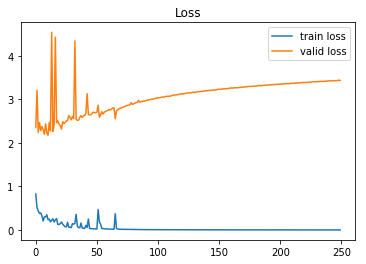

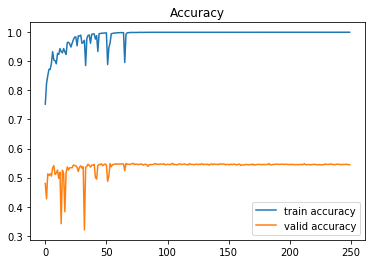

In [11]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()